# Student Grade Analysis & Prediction

**Objective:**    
                  <ol>
    <li>
        **Analysis of all data columns.**
    </li>
    <li>
                  **Prediction of the final grade of Portugese high school students.**
    </li>
    <li>
                  **How alcohol cumsumption affects the academics and how its depends on the vast number of factors.**
    </li>
    </ol>

**Data Set Information**
The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. (Regression)
[Link to dataset](https://www.kaggle.com/uciml/student-alcohol-consumption)


**Citation:**
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.[Web Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
# Loading data into pandas dataframe- 'math_data'

math_data = pd.read_csv(r"C:\Users\anktr\3D Objects\DMA Project\student-mat.csv")

# Getting total no. of rows and columns
math_data.shape

(395, 33)

In [3]:
# What are the features?
# Explanation of features are given in 'Data-Description.pdf'
math_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
# Checking for any null value or noise.
math_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
math_data.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [7]:
# Function to find the binay categorical variables
def binary_data(df):
    for data in df:
        return(np.array(df.select_dtypes(include='object').columns))

In [8]:
print('_______Binary attributes_________\n',binary_data(math_data))

_______Binary attributes_________
 ['school' 'sex' 'address' 'famsize' 'Pstatus' 'Mjob' 'Fjob' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


# Data Visualization

###  Binary data analysis

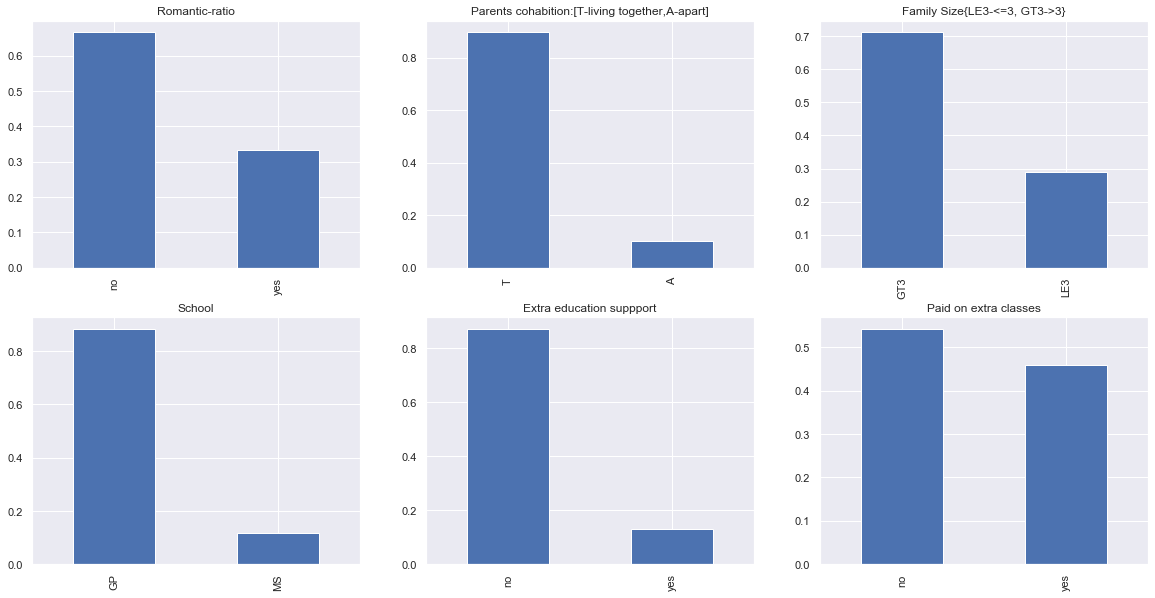

In [9]:
plt.subplot(231)
math_data['romantic'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Romantic-ratio')

plt.subplot(232)
math_data['Pstatus'].value_counts(normalize=True).plot.bar(title='Parents cohabition:[T-living together,A-apart]')

plt.subplot(233)
math_data['famsize'].value_counts(normalize=True).plot.bar(title='Family Size{LE3-<=3, GT3->3}')


plt.subplot(234)
math_data['school'].value_counts(normalize=True).plot.bar(title='School')


#plt.subplot(235)
#math_data['Pstatus'].value_counts(normalize=True).plot.bar(title=')


plt.subplot(235)
math_data['schoolsup'].value_counts(normalize=True).plot.bar(title='Extra education suppport')

plt.subplot(236)
math_data['paid'].value_counts(normalize=True).plot.bar(title='Paid on extra classes')

plt.show()

In [10]:
math_data['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

sex    F   M
Walc        
1     94  57
2     51  34
3     45  35
4     14  37
5      4  24


Text(0.5, 1.0, 'How frequently does a student drinks on weekend?')

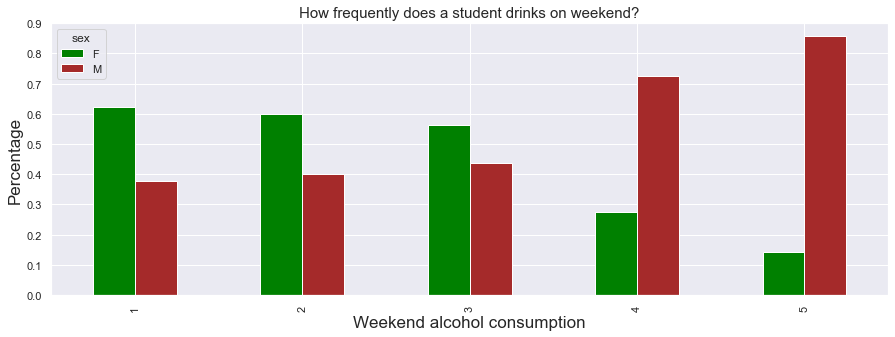

In [11]:
pa=pd.crosstab(math_data['Walc'],math_data['sex'])
print(pa)
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',color=['green','brown'],figsize=(15,5))
plt.xlabel('Weekend alcohol consumption',fontsize=17)
plt.ylabel('Percentage',fontsize=17)
plt.title('How frequently does a student drinks on weekend?',fontsize=15)
#plt.savefig('Gender')

sex     F    M
Dalc          
1     167  109
2      33   42
3       5   21
4       2    7
5       1    8


Text(0.5, 1.0, 'How frequently does a student drinks on week-days?')

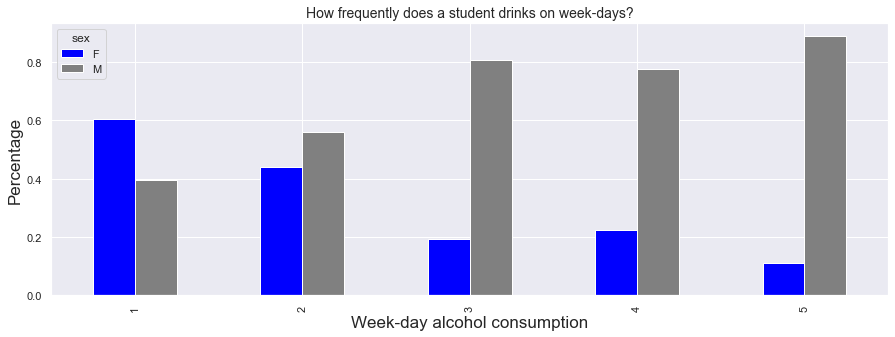

In [12]:
pa=pd.crosstab(math_data['Dalc'],math_data['sex'])
print(pa)
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',color=['blue','grey'],figsize=(15,5))
plt.xlabel('Week-day alcohol consumption',fontsize=17)
plt.ylabel('Percentage',fontsize=17)
plt.title('How frequently does a student drinks on week-days?',fontsize=14)
#plt.savefig('gender1')

school   GP  MS
Walc           
1       141  10
2        73  12
3        64  16
4        45   6
5        26   2


Text(0.5, 1.0, 'Which school have more drunkers')

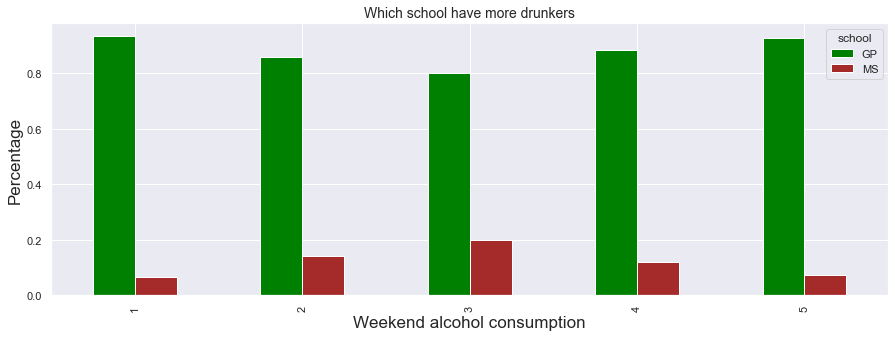

In [13]:
pa=pd.crosstab(math_data['Walc'],math_data['school'])
print(pa)
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',color=['green','brown'],figsize=(15,5))
plt.xlabel('Weekend alcohol consumption',fontsize=17)
plt.ylabel('Percentage',fontsize=17)
plt.title('Which school have more drunkers',fontsize=14)

school   GP  MS
Dalc           
1       249  27
2        67   8
3        19   7
4         6   3
5         8   1


Text(0.5, 1.0, 'How frequently does a student drinks on week-days?')

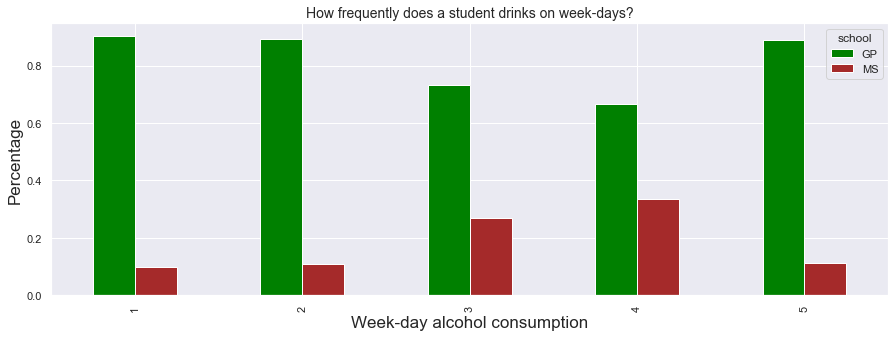

In [14]:
pa=pd.crosstab(math_data['Dalc'],math_data['school'])
print(pa)
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',color=['green','brown'],figsize=(15,5))
plt.xlabel('Week-day alcohol consumption',fontsize=17)
plt.ylabel('Percentage',fontsize=17)
plt.title('How frequently does a student drinks on week-days?',fontsize=14)

<h2>Age analysis</h2>

[Text(0, 0.5, 'School'), Text(0.5, 0, 'Age')]

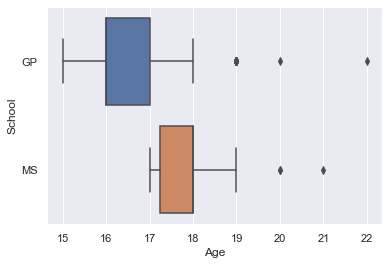

In [15]:
ax = sns.boxplot(math_data['age'],math_data['school'])
ax.set(xlabel='Age',ylabel='School')

Text(0.5, 1.0, 'Weekend alcohol consumption of different ages in two schools')

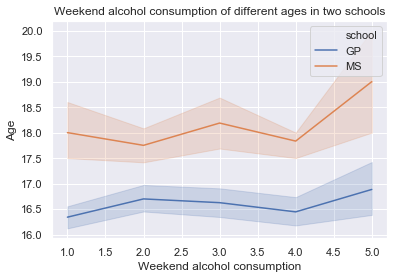

In [16]:
ax = sns.lineplot(math_data['Walc'],math_data['age'],hue='school',data=math_data)
ax.set(xlabel='Weekend alcohol consumption',ylabel='Age')
ax.set_title('Weekend alcohol consumption of different ages in two schools')

Text(0.5, 1.0, 'Week-day alcohol consumption of different ages in two schools')

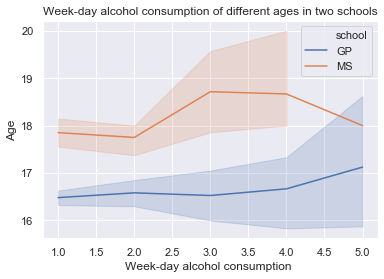

In [17]:
ax = sns.lineplot(math_data['Dalc'],math_data['age'],hue='school',data=math_data)
ax.set(xlabel='Week-day alcohol consumption ',ylabel='Age')
ax.set_title('Week-day alcohol consumption of different ages in two schools')

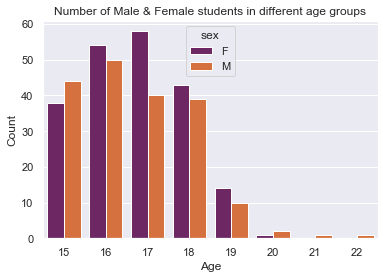

In [18]:
b = sns.countplot(x='age',hue='sex', data=math_data, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

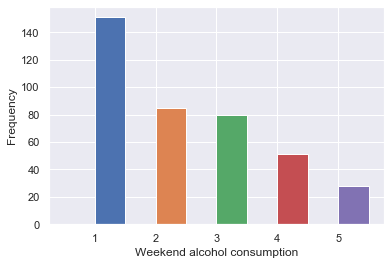

In [19]:
math_data['Walc'].groupby(math_data['Walc']).plot(kind='hist',bins=2)
plt.xlabel('Weekend alcohol consumption')
plt.show()

In [20]:
math_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


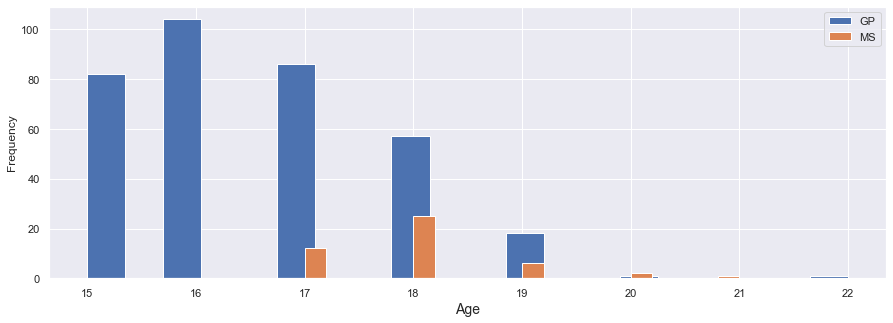

In [21]:
math_data['age'].groupby(math_data['school']).plot(kind='hist',figsize=(15,5),bins=20)
plt.legend()
plt.xlabel('Age',fontsize=14)
plt.show()

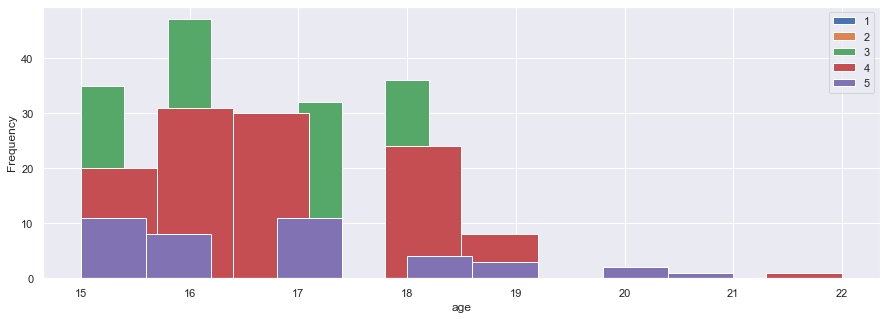

In [22]:
math_data['age'].groupby(math_data['freetime']).plot(kind='hist',figsize=(15,5))
plt.xlabel('age')
plt.legend()

plt.show()

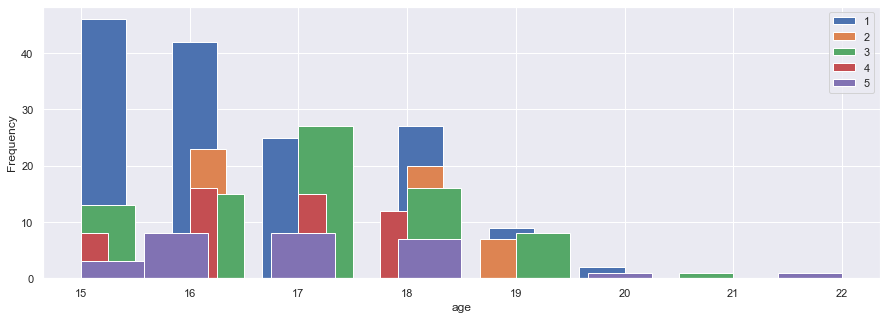

In [23]:
math_data['age'].groupby(math_data['Walc']).plot(kind='hist',figsize=(15,5),bins=12)
plt.xlabel('age')
plt.legend()
plt.show()

Text(0, 0.5, 'Percentage')

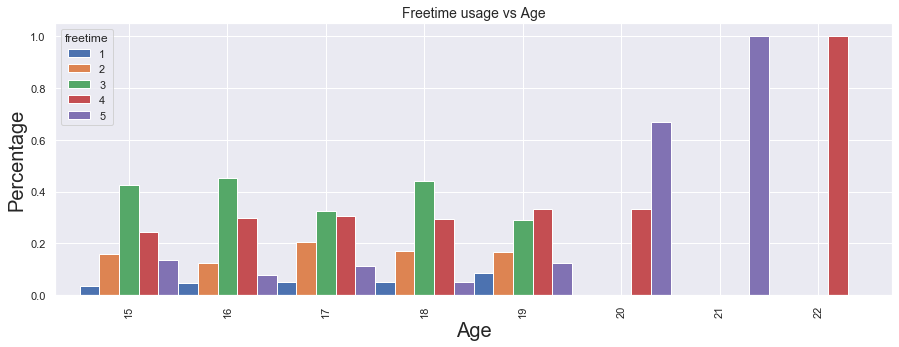

In [24]:
pa=pd.crosstab(math_data['age'],math_data['freetime'])
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',width=1,figsize=(15,5))
plt.title('Freetime usage vs Age',fontsize=14)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Percentage',fontsize=20)

In [25]:
l=[1,2,3,4,5] #Alcohol consumption level
labels="1-Very Low","2-Low","3-Medium","4-High","5-Very High"
colorset="darkorange","chartreuse","seagreen","slateblue","firebrick"

In [26]:
def f(alc,l1): #alc ="yes" or "no" , l1= 1,2,3,4,5 (level of freetime)(1- very low-5 very high)
    if alc=="Dalc":
        y= list(map(lambda l :list(math_data[(math_data.freetime==l1)].Dalc).count(l),l)) 
        percent=[i/sum(y)*100 for i in y]
        #print("1-Vey Low:",y[0],"2-Low:",y[1],"3-Medium",y[2] ,"4-High",y[3], "5-Very High:",y[4])
        #print("1-Very Low:",percent[0],"2-Low:",percent[1],"3-Medium",percent[2] ,"4-High",percent[3], "5-Very High:",percent[4])
        return percent
    elif alc=="Walc":
        y= list(map(lambda l :list(math_data[(math_data.freetime==l1)].Walc).count(l),l)) 
        percent=[i/sum(y)*100 for i in y]
        
        #print("1-Very Low:",y[0],"2-Low:",y[1],"3-Medium",y[2] ,"4-High",y[3], "5-Very High:",y[4])
        #print("1-Very Low:",percent[0],"2-Low:",percent[1],"3-Medium",percent[2] ,"4-High",percent[3], "5-Very High:",percent[4])
        
        return percent

In [27]:
DalcFreetime= {"Workday\Free Time": ["1-Very Low","2-Low","3-Medium","4-High","5-Very High"],
        "1-Very Low": f("Dalc",1),"2-Low": f("Dalc",2), "3-Medium": f("Dalc",3),
        "4-High":f("Dalc",4),"5-Very High": f("Dalc",5)}


dfDalcFreetime=pd.DataFrame(DalcFreetime)

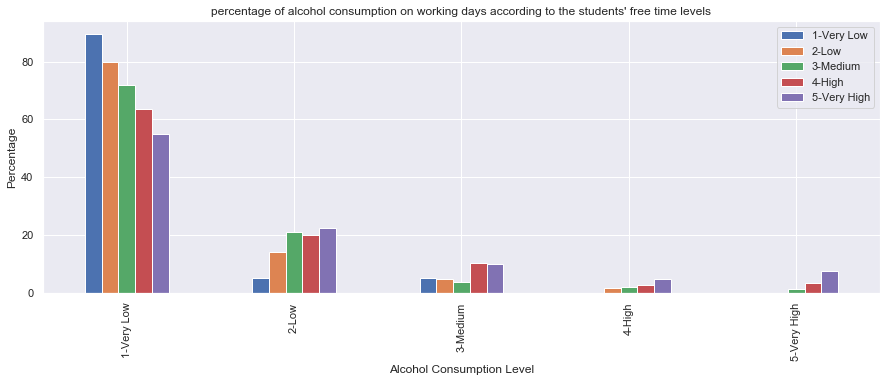

In [28]:
dfDalcFreetime.plot(kind='bar',x="Workday\Free Time" ,grid=True, title="percentage of alcohol consumption on working days according to the students' free time levels",figsize=(15,5),
        sharex=True, sharey=False, legend=True)

plt.ylabel("Percentage")
plt.xlabel("Alcohol Consumption Level")

plt.show()

In [29]:
WalcFreetime= {"Weekend\Free Time": ["1-Very Low","2-Low","3-Medium","4-High","5-Very High"],
        "1-Very Low": f("Walc",1),"2-Low": f("Walc",2), "3-Medium": f("Walc",3),
        "4-High":f("Walc",4),"5-Very High": f("Walc",5)}


dfWalcFreetime=pd.DataFrame(WalcFreetime)

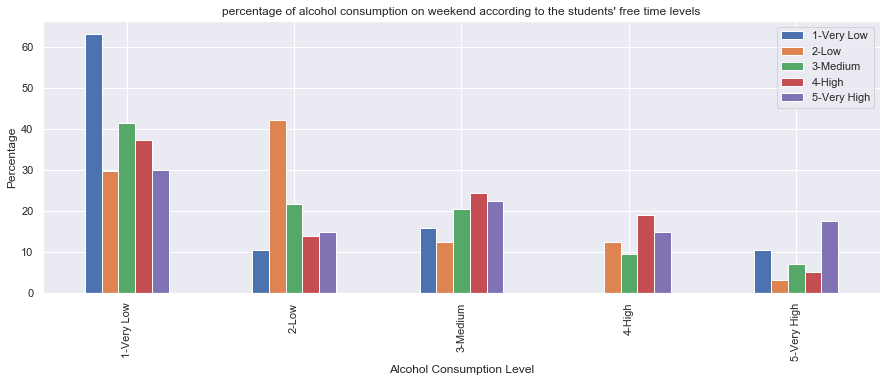

In [30]:
dfWalcFreetime.plot(kind='bar',x="Weekend\Free Time" ,grid=True, title="percentage of alcohol consumption on weekend according to the students' free time levels",figsize=(15,5),
        sharex=True, sharey=False, legend=True)

plt.ylabel("Percentage")
plt.xlabel("Alcohol Consumption Level")

plt.show()

Text(0, 0.5, 'Percentage')

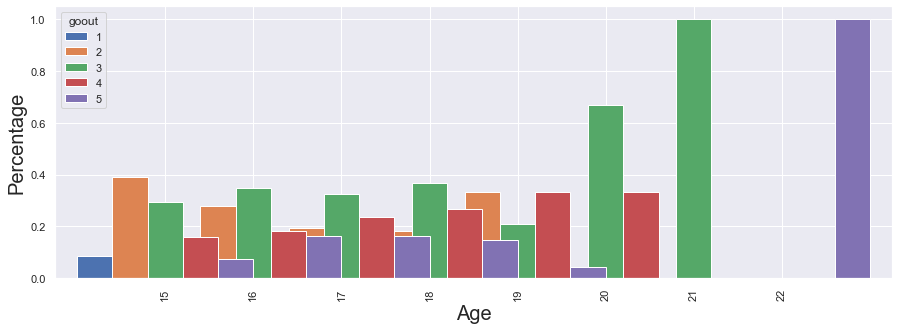

In [31]:
pa=pd.crosstab(math_data['age'],math_data['goout'])
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',width=2,figsize=(15,5),stacked=False)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Percentage',fontsize=20)

#### Time Consumption of different age groups

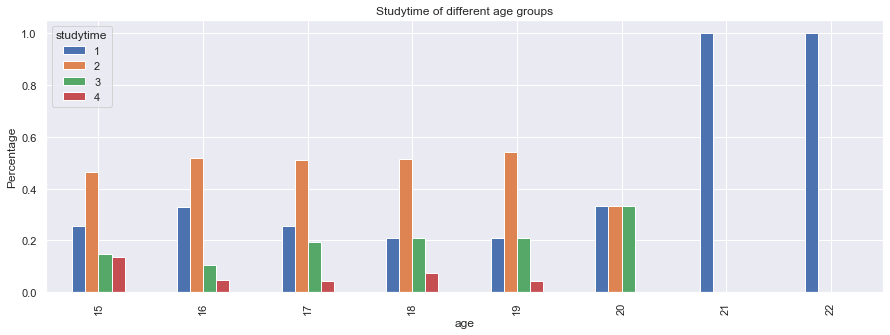

In [32]:
pa = pd.crosstab(math_data['age'],math_data['studytime'])
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar' ,figsize=(15,5))
plt.ylabel('Percentage')
plt.title('Studytime of different age groups')
plt.show()

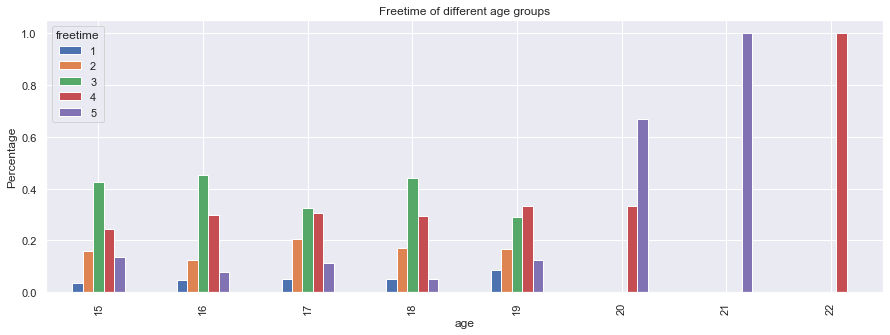

In [33]:
pa = pd.crosstab(math_data['age'],math_data['freetime'])
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(15,5))
plt.ylabel('Percentage')
plt.title('Freetime of different age groups')
plt.show()

Text(0.5, 1.0, 'Which age group uses more internet in their freetime')

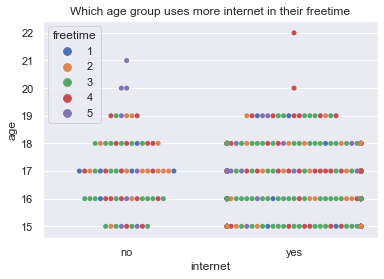

In [34]:
b = sns.swarmplot(math_data['internet'],math_data['age'],hue='freetime',data=math_data)
b.axes.set_title('Which age group uses more internet in their freetime')

In [35]:
math_data['internet'].groupby(math_data['freetime']).value_counts()

freetime  internet
1         yes          13
          no            6
2         yes          51
          no           13
3         yes         135
          no           22
4         yes          98
          no           17
5         yes          32
          no            8
Name: internet, dtype: int64

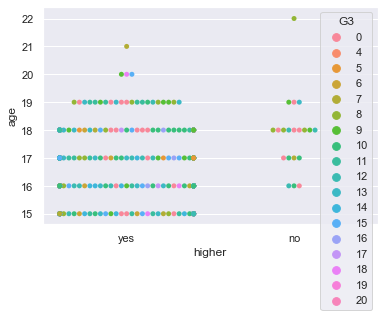

In [36]:
b = sns.swarmplot(math_data['higher'],math_data['age'],hue='G3',data=math_data)

Text(0.5, 1.0, "Mother's Education")

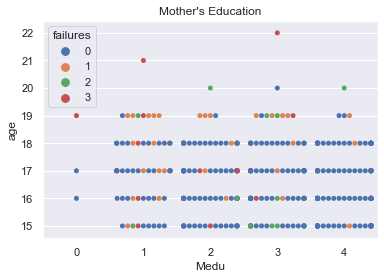

In [37]:
b = sns.swarmplot(math_data['Medu'],math_data['age'],hue='failures',data=math_data)
b.axes.set_title("Mother's Education")

### Mother's education is important!

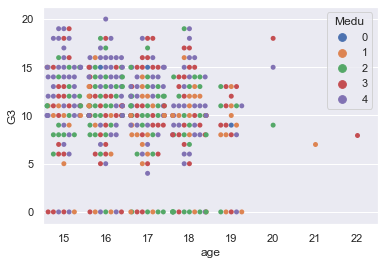

In [38]:
sns.swarmplot(math_data['age'],math_data['G3'],hue='Medu',data=math_data)

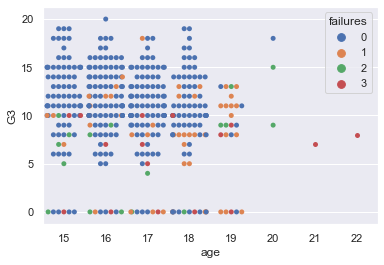

In [39]:
sns.swarmplot(math_data['age'],math_data['G3'],hue='failures',data=math_data)

In [40]:
data1= math_data.copy()

In [41]:
data1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [42]:
data1 = pd.get_dummies(data1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text yticklabel objects>)

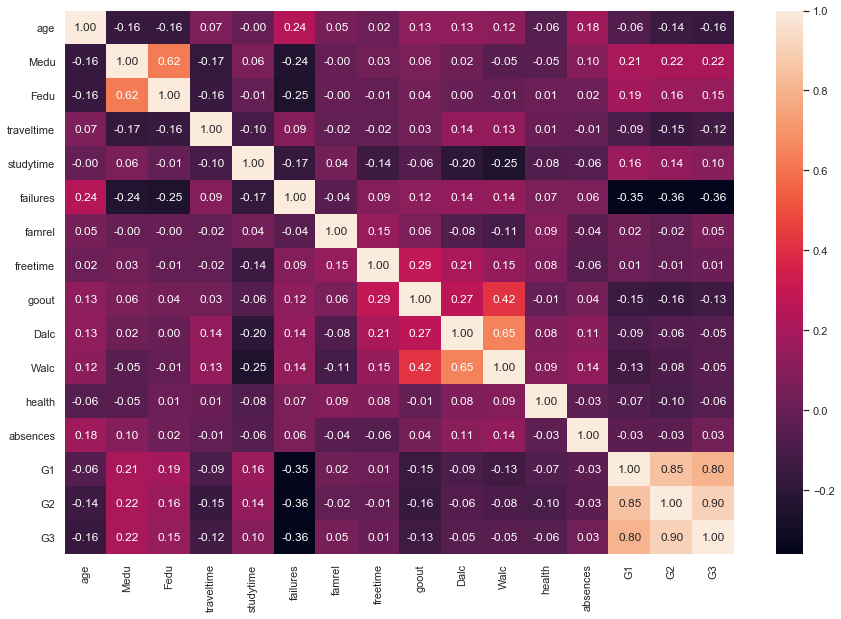

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(math_data.corr(method='pearson'),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [44]:
data1.corr()['G3'].sort_values(ascending=False)

G3                   1.000000
G2                   0.904868
G1                   0.801468
Medu                 0.217147
higher_yes           0.182465
Fedu                 0.152457
romantic_no          0.129970
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
reason_reputation    0.095692
Fjob_teacher         0.095374
schoolsup_no         0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
Pstatus_A            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery_yes          0.051568
famrel               0.051363
school_GP            0.045017
famsup_no            0.039157
absences             0.034247
guardian_father      0.032493
guardian_mother      0.022338
activities_yes       0.016100
freetime             0.011307
Fjob_at_home        -0.013385
activities_no       -0.016100
Fjob_servi

## MODEL BUILDING

In [45]:
x = data1['G3']
y = data1.drop('G3',axis=1)

In [46]:
x

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [47]:
y.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.metrics import mean_squared_error as MSE

In [197]:
x_train, x_test, y_train , y_test = train_test_split(y,x ,random_state=345,test_size=0.2)

In [198]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((316, 58), (79, 58), (316,), (79,))

In [199]:
model1 =  LinearRegression(fit_intercept=True,copy_X=True,normalize=False)
model1

LinearRegression()

In [200]:
model1.fit(x_train, y_train)

LinearRegression()

In [201]:
predicted_G3 = model1.predict(x_train)

In [202]:
acc = model1.score(x_test,y_test)

In [203]:
acc

0.7772237251323542

In [204]:
model2 = DecisionTreeRegressor(criterion='mse',max_depth=5,splitter='best')

In [205]:
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [206]:
predicted_G3_dt = model2.predict(x_train)

In [207]:
acuracy = model2.score(x_test, y_test)
acuracy

0.7332163301963008

In [210]:
model3= GradientBoostingRegressor(loss='ls',criterion='mse',max_depth=5,learning_rate=0.1,n_estimators=50)
model3.fit(x_train, y_train)
predictg3 = model3.predict(x_train)
acry = model3.score(x_test,y_test)
acry

0.8559198164000107

# Model Performances

In [211]:
def print_rmse(orig_values, predict_values):
    rmse = np.sqrt(MSE(orig_values, predict_values))
    print("RMSE = {:.2f}".format(rmse))

In [212]:
print("Accuracy of different models: ")

print('Linear Regression: ',acc)
print_rmse(y_train,predicted_G3)
print("============================")
print('Decision Tree Regression: ',acuracy)
print_rmse(y_train,predicted_G3_dt)
print("============================")
print('GradientBoosting Regression: ',acry)
print_rmse(y_train,predictg3)

Accuracy of different models: 
Linear Regression:  0.7772237251323542
RMSE = 1.74
Decision Tree Regression:  0.7332163301963008
RMSE = 1.20
GradientBoosting Regression:  0.8559198164000107
RMSE = 0.32


### XgboostRegression gives us best results in better accuracy with **rmse value of 0.32**